In [1]:
# Libraries
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_color_codes("muted")

In [2]:
# Load Data
url = 'happyscore_income.csv'
df = pd.read_csv(url, header='infer')

# Dropping Columns
drp_cols = ['region','country.1','adjusted_satisfaction','std_satisfaction','median_income']
df.drop(drp_cols,axis=1,inplace=True)

# Inspect
df.head()

,country,avg_satisfaction,avg_income,income_inequality,happyScore,GDP
0,Armenia,4.9,2096.76,31.445556,4.350,0.76821
1,Angola,4.3,1448.88,42.720000,4.033,0.75778
2,Argentina,7.1,7101.12,45.475556,6.574,1.05351
3,Austria,7.2,19457.04,30.296250,7.200,1.33723
4,Australia,7.6,19917.00,35.285000,7.284,1.33358


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_satisfaction,111.0,5.936937,1.356394,2.5000,5.100000,6.00000,7.000000,8.500000
avg_income,111.0,6442.751416,6479.533692,572.8800,1519.388684,3889.32000,7867.402500,26182.275000
income_inequality,111.0,38.417805,8.375557,24.2150,32.182857,36.48000,43.380000,63.726667
happyScore,111.0,5.421910,1.180801,2.8390,4.568000,5.26800,6.392000,7.587000
GDP,111.0,0.841909,0.387591,0.0153,0.509930,0.91861,1.149485,1.563910


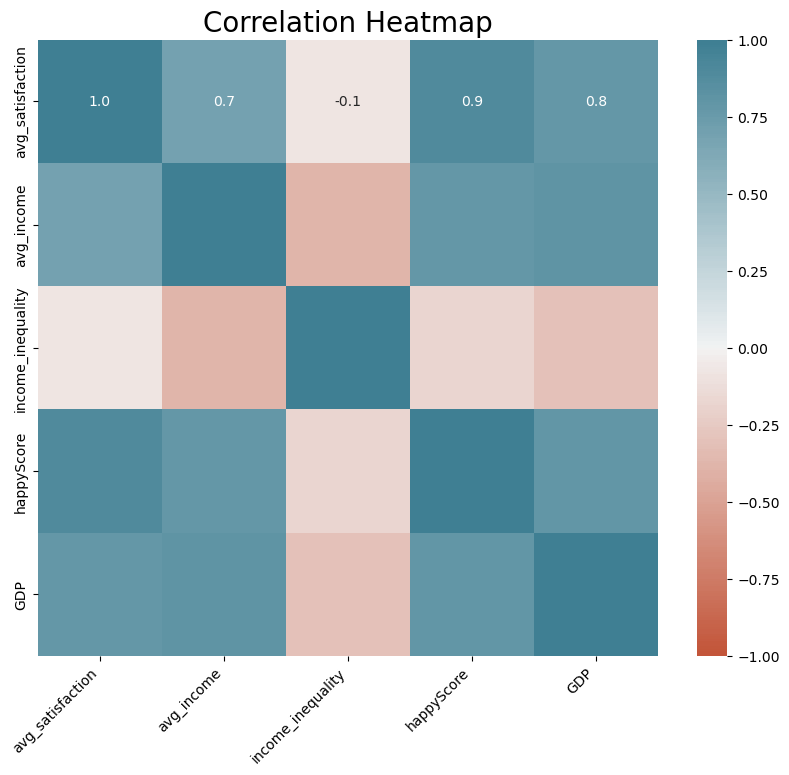

In [4]:
# Correlation Heatmap

corr = df[df.columns[1:]].corr()

plt.figure(figsize=(10,8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False, annot=True,fmt='.1f')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title("Correlation Heatmap", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Top 3 Countries with Low Satisfaction Score')

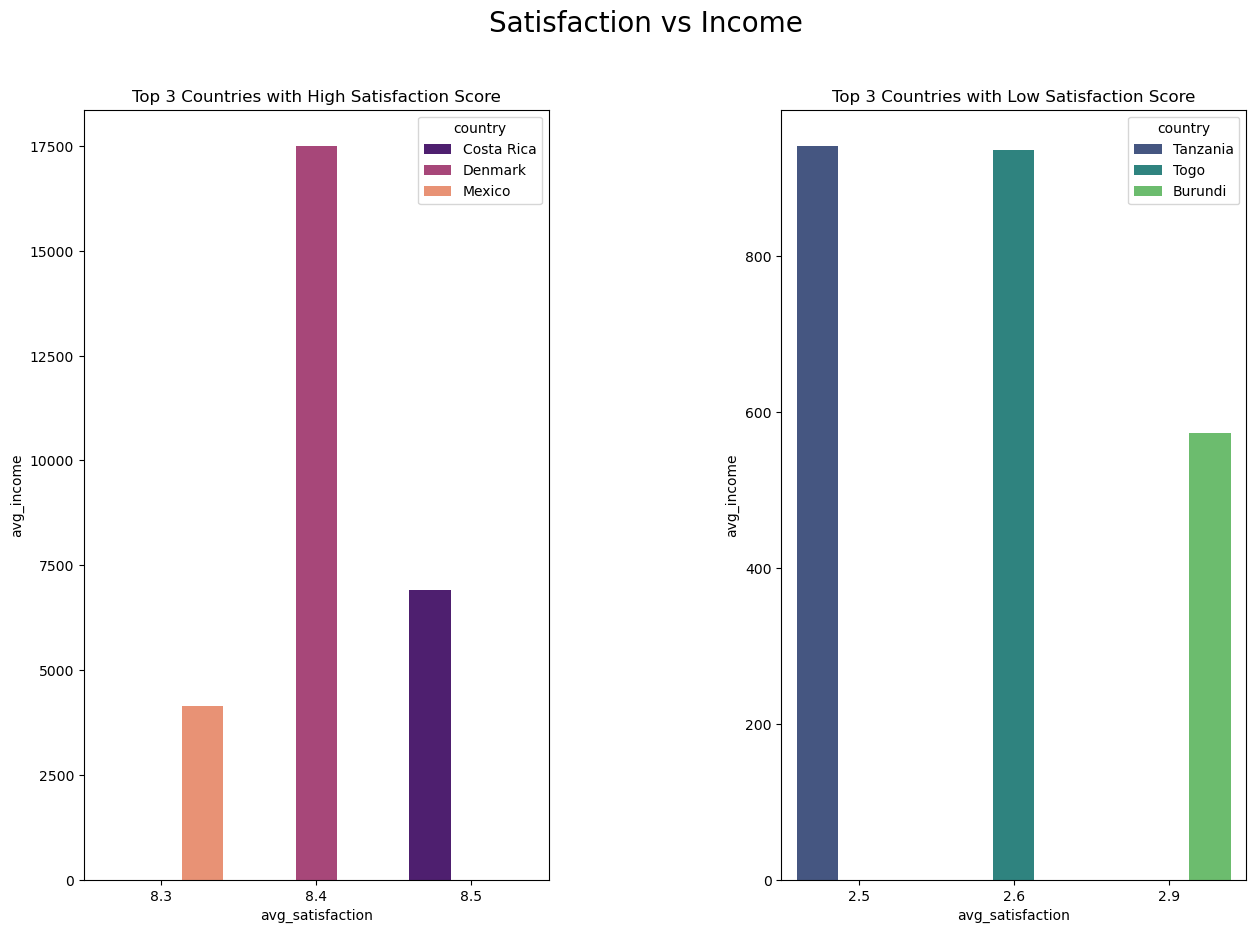

In [5]:
'''Data Visualisation - Avg. Satisfaction vs Avg. Income'''

# Plot Config
fig, axes = plt.subplots(1, 2, figsize=(15,10))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Satisfaction vs Income', fontsize=20)
axes = axes.flatten()

temp = df[['country','avg_satisfaction','avg_income']]

# Highest Satisfaction Score
tempL = temp.nlargest(3, columns=['avg_satisfaction'])
tempL.reset_index(drop=True, inplace=True)

# Lowest Satisfaction Score
tempS = temp.nsmallest(3, columns=['avg_satisfaction'])
tempS.reset_index(drop=True, inplace=True)

# Plot
sns.barplot(ax=axes[0], data=tempL, x='avg_satisfaction', y='avg_income', hue="country", palette = 'magma')          
axes[0].set_title("Top 3 Countries with High Satisfaction Score")

sns.barplot(ax=axes[1], data=tempS, x='avg_satisfaction', y='avg_income', hue="country", palette = 'viridis')          
axes[1].set_title("Top 3 Countries with Low Satisfaction Score")

Text(0.5, 1.0, 'Top 3 Countries with Low Satisfaction Score')

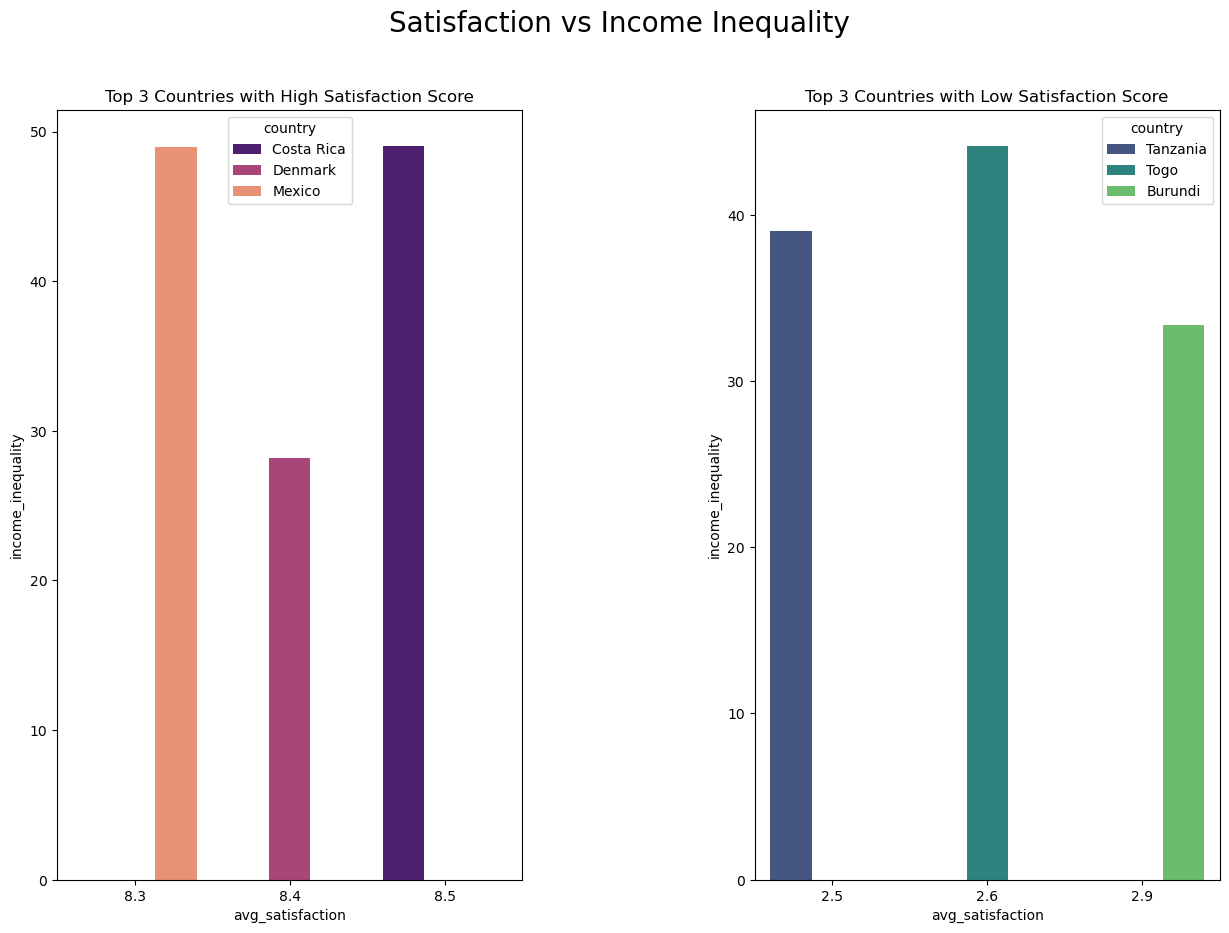

In [6]:
# Plot Config
fig, axes = plt.subplots(1, 2, figsize=(15,10))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Satisfaction vs Income Inequality', fontsize=20)
axes = axes.flatten()

temp = df[['country','avg_satisfaction','income_inequality']]

# Highest Satisfaction Score
tempL = temp.nlargest(3, columns=['avg_satisfaction'])
tempL.reset_index(drop=True, inplace=True)

# Lowest Satisfaction Score
tempS = temp.nsmallest(3, columns=['avg_satisfaction'])
tempS.reset_index(drop=True, inplace=True)

# Plot
sns.barplot(ax=axes[0], data=tempL, x='avg_satisfaction', y='income_inequality', hue="country", palette = 'magma')          
axes[0].set_title("Top 3 Countries with High Satisfaction Score")

sns.barplot(ax=axes[1], data=tempS, x='avg_satisfaction', y='income_inequality', hue="country", palette = 'viridis')          
axes[1].set_title("Top 3 Countries with Low Satisfaction Score")

Text(0.5, 1.0, 'Top 3 Countries with Low Satisfaction Score')

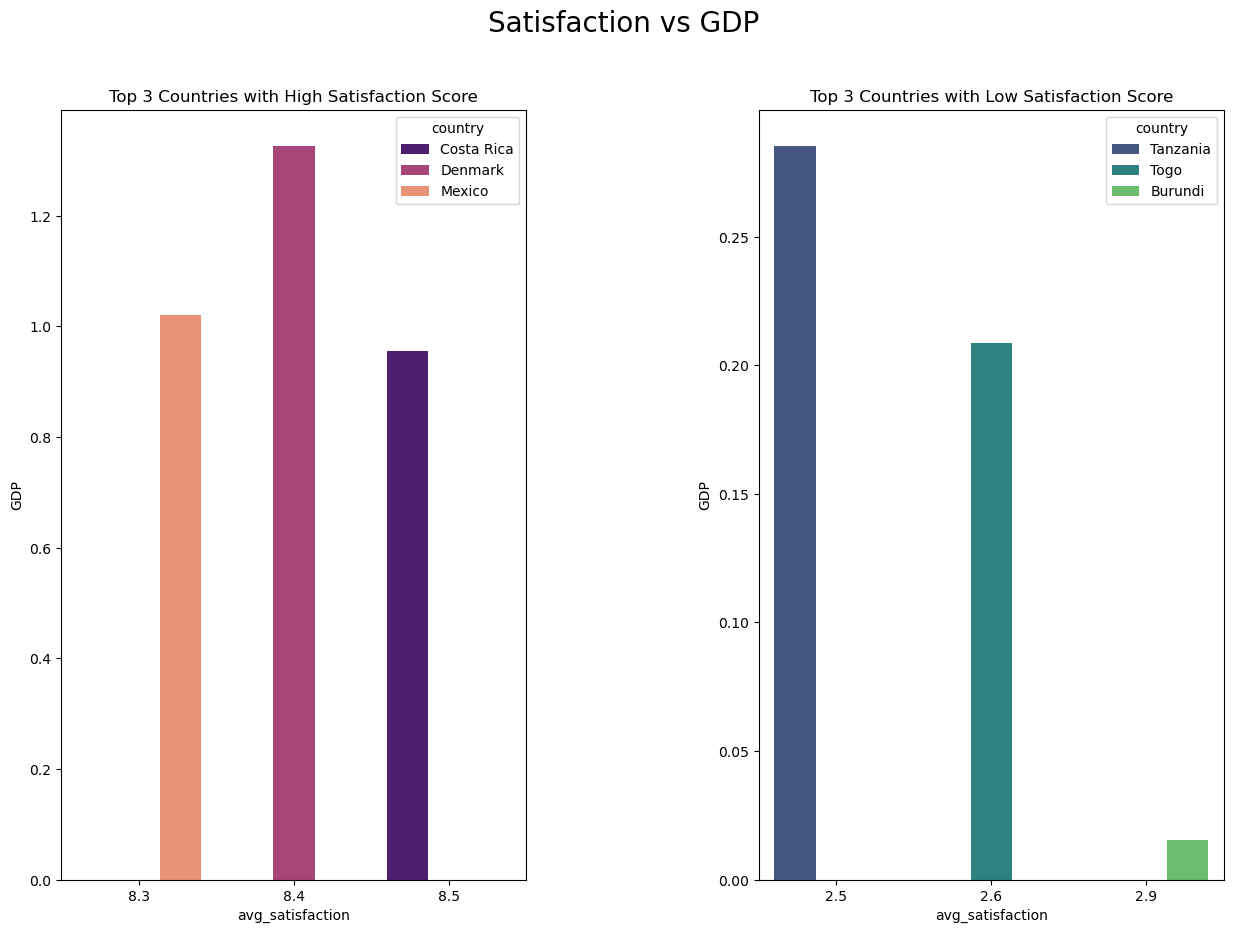

In [7]:
# Plot Config
fig, axes = plt.subplots(1, 2, figsize=(15,10))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Satisfaction vs GDP', fontsize=20)
axes = axes.flatten()

temp = df[['country','avg_satisfaction','GDP']]

# Highest Satisfaction Score
tempL = temp.nlargest(3, columns=['avg_satisfaction'])
tempL.reset_index(drop=True, inplace=True)

# Lowest Satisfaction Score
tempS = temp.nsmallest(3, columns=['avg_satisfaction'])
tempS.reset_index(drop=True, inplace=True)

# Plot
sns.barplot(ax=axes[0], data=tempL, x='avg_satisfaction', y='GDP', hue="country", palette = 'magma')          
axes[0].set_title("Top 3 Countries with High Satisfaction Score")

sns.barplot(ax=axes[1], data=tempS, x='avg_satisfaction', y='GDP', hue="country", palette = 'viridis')          
axes[1].set_title("Top 3 Countries with Low Satisfaction Score")

Text(0.5, 1.0, 'Top 3 Countries with Low Happiness Score')

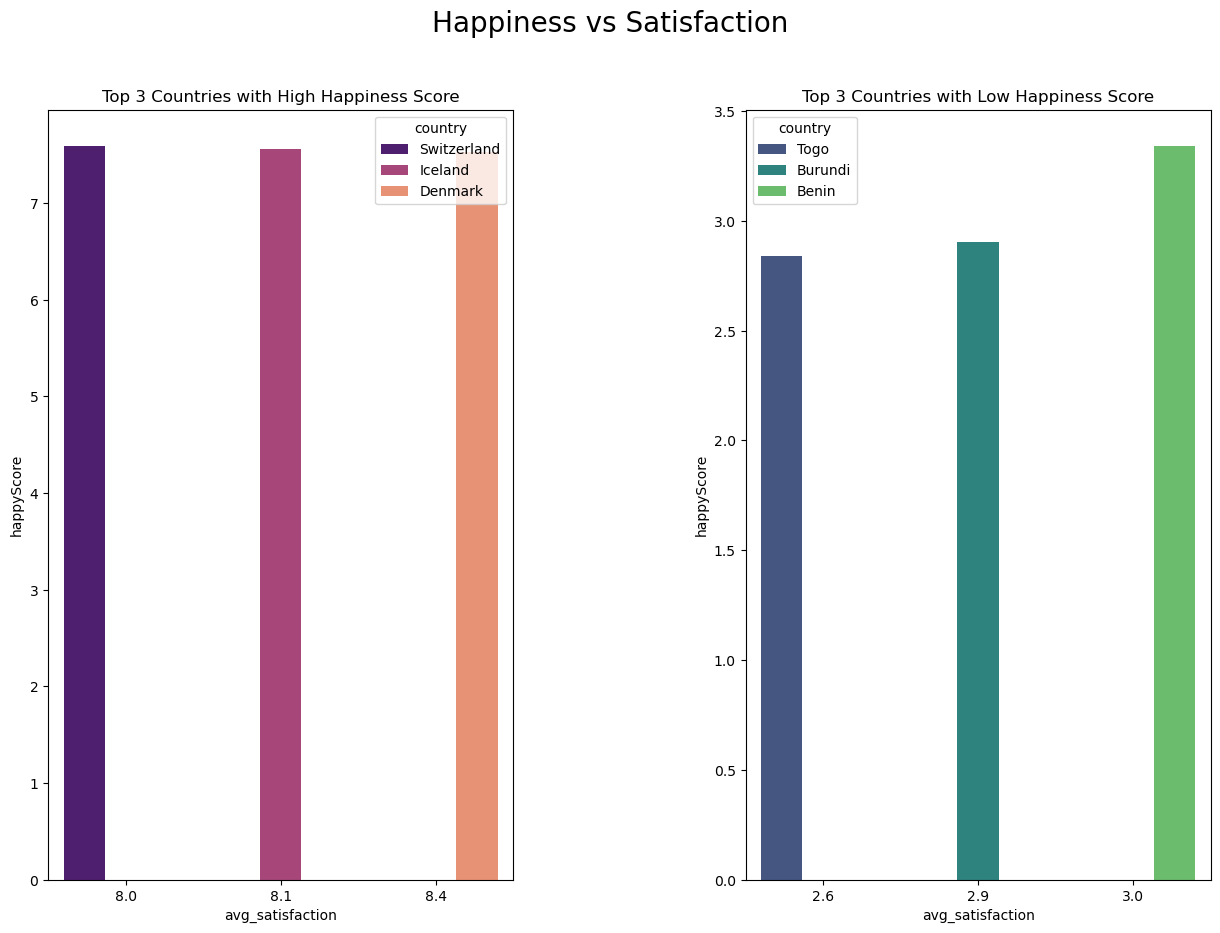

In [8]:
# Plot Config
fig, axes = plt.subplots(1, 2, figsize=(15,10))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Happiness vs Satisfaction', fontsize=20)
axes = axes.flatten()

temp = df[['country','avg_satisfaction','happyScore']]

# Highest Happiness Score
tempL = temp.nlargest(3, columns=['happyScore'])
tempL.reset_index(drop=True, inplace=True)

# Lowest Happiness Score
tempS = temp.nsmallest(3, columns=['happyScore'])
tempS.reset_index(drop=True, inplace=True)

# Plot
sns.barplot(ax=axes[0], data=tempL, x='avg_satisfaction', y='happyScore', hue="country", palette = 'magma')          
axes[0].set_title("Top 3 Countries with High Happiness Score")

sns.barplot(ax=axes[1], data=tempS, x='avg_satisfaction', y='happyScore', hue="country", palette = 'viridis')          
axes[1].set_title("Top 3 Countries with Low Happiness Score") 

Text(0.5, 1.0, 'Top 3 Countries with Low Happiness Score')

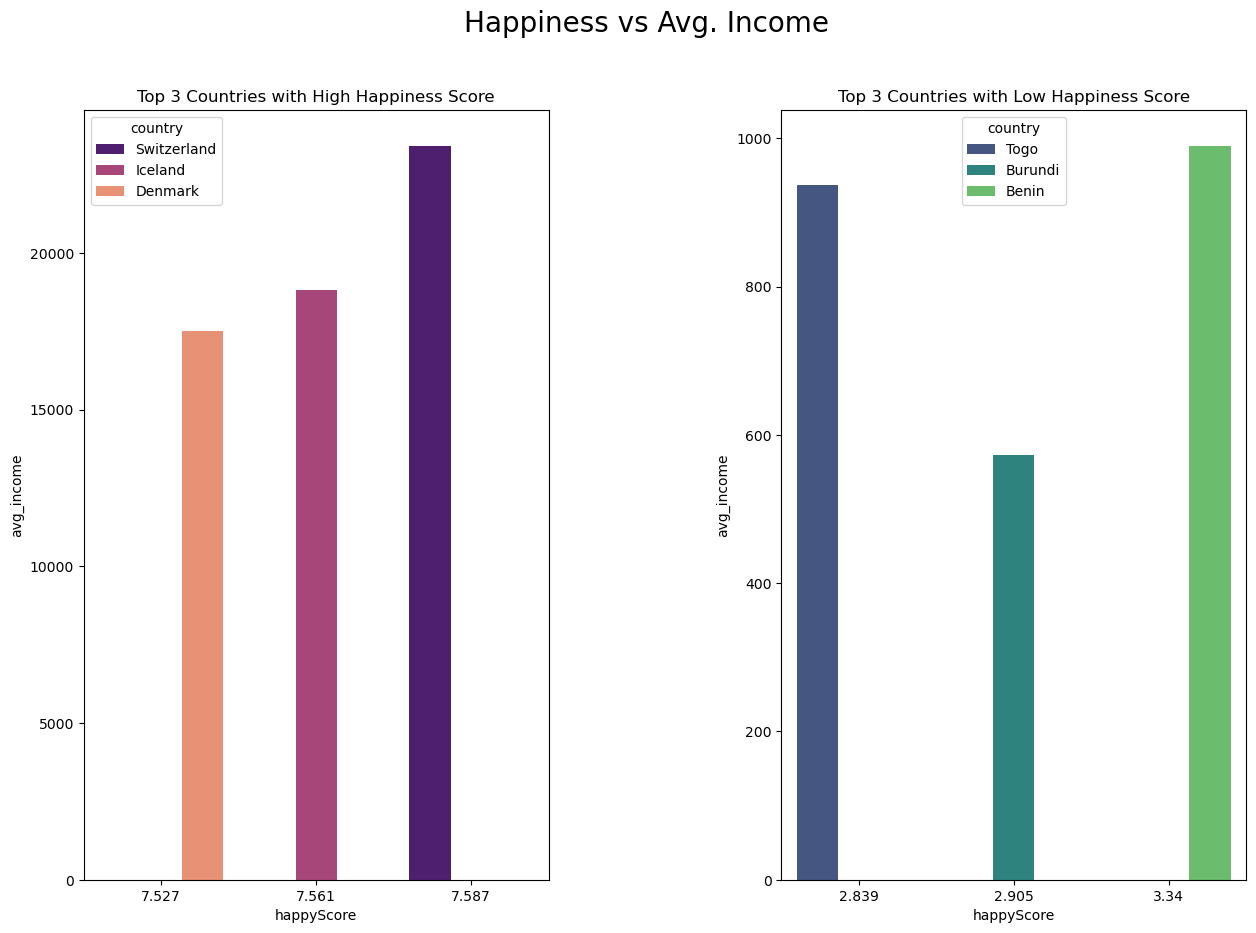

In [9]:
# Plot Config
fig, axes = plt.subplots(1, 2, figsize=(15,10))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Happiness vs Avg. Income', fontsize=20)
axes = axes.flatten()

temp = df[['country','avg_income','happyScore']]

# Highest Happiness Score
tempL = temp.nlargest(3, columns=['happyScore'])
tempL.reset_index(drop=True, inplace=True)

# Lowest Happiness Score
tempS = temp.nsmallest(3, columns=['happyScore'])
tempS.reset_index(drop=True, inplace=True)

# Plot
sns.barplot(ax=axes[0], data=tempL, x='happyScore', y='avg_income', hue="country", palette = 'magma')          
axes[0].set_title("Top 3 Countries with High Happiness Score")

sns.barplot(ax=axes[1], data=tempS, x='happyScore', y='avg_income', hue="country", palette = 'viridis')          
axes[1].set_title("Top 3 Countries with Low Happiness Score") 